In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

from pandas_datareader import data,wb

In [3]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2022,1,1)

In [4]:
#Bank of America
BAC = data.DataReader('BAC', 'yahoo', start,end)
#Citibank
C = data.DataReader('C','yahoo',start,end)
#Goldman Sachs
GS = data.DataReader('GS','yahoo',start,end)
#JP Morgan Chase
JPM = data.DataReader('JPM','yahoo',start,end)

In [5]:
tickers = ['BAC','C','GS','JPM']

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM],axis =1,keys = tickers)

In [7]:
bank_stocks.columns.names = ['Bank Tickers','Stock Info']

In [8]:
bank_stocks

Bank Tickers        BAC                                                \
Stock Info         High        Low       Open      Close       Volume   
Date                                                                    
2015-12-31    17.070000  16.830000  17.010000  16.830000   47153000.0   
2016-01-04    16.490000  16.250000  16.450001  16.430000  114888000.0   
2016-01-05    16.590000  16.230000  16.520000  16.430000   66670000.0   
2016-01-06    16.290001  16.020000  16.190001  16.080000  102760800.0   
2016-01-07    15.900000  15.440000  15.730000  15.500000  116255900.0   
...                 ...        ...        ...        ...          ...   
2021-12-27    44.820000  44.310001  44.549999  44.639999   33879200.0   
2021-12-28    45.080002  44.419998  44.470001  44.700001   32492400.0   
2021-12-29    45.119999  44.599998  44.849998  44.630001   25294900.0   
2021-12-30    45.099998  44.480000  44.750000  44.529999   23852200.0   
2021-12-31    44.720001  44.279999  44.520000  44.490002   24253900.0   

Bank Tickers                     C                                   ...  \
Stock Info    Adj Close       High        Low       Open      Close  ...   
Date                                                                 ...   
2015-12-31    14.709889  52.389999  51.750000  52.070000  51.750000  ...   
2016-01-04    14.360278  51.189999  50.189999  50.750000  51.130001  ...   
2016-01-05    14.360278  51.610001  50.410000  51.540001  50.860001  ...   
2016-01-06    14.054369  50.580002  49.759998  50.099998  50.119999  ...   
2016-01-07    13.547432  49.380001  47.500000  49.070000  47.560001  ...   
...                 ...        ...        ...        ...        ...  ...   
2021-12-27    43.879288  60.939999  60.000000  60.400002  60.650002  ...   
2021-12-28    43.938267  61.330002  60.310001  60.439999  60.619999  ...   
2021-12-29    43.869461  60.980000  60.270000  60.810001  60.540001  ...   
2021-12-30    43.771164  61.070000  60.389999  60.619999  60.430000  ...   
2021-12-31    43.731846  60.759998  60.119999  60.430000  60.389999  ...   

Bank Tickers          GS                                            JPM  \
Stock Info          Open       Close     Volume   Adj Close        High   
Date                                                                      
2015-12-31    181.160004  180.229996  1773900.0  159.413025   66.779999   
2016-01-04    175.789993  177.139999  3745500.0  156.679932   64.059998   
2016-01-05    176.710007  174.089996  4521600.0  153.982224   64.129997   
2016-01-06    171.309998  169.839996  5539400.0  150.223145   63.130001   
2016-01-07    166.669998  164.619995  5687900.0  145.606049   62.000000   
...                  ...         ...        ...         ...         ...   
2021-12-27    386.989990  388.040009  1430400.0  380.544891  158.199997   
2021-12-28    388.929993  387.609985  1528200.0  380.123199  160.149994   
2021-12-29    387.970001  386.200012  1327800.0  378.740448  159.630005   
2021-12-30    387.750000  385.519989  1160100.0  378.073547  160.240005   
2021-12-31    385.000000  382.549988  1601300.0  375.160919  159.289993   

Bank Tickers                                                              
Stock Info           Low        Open       Close      Volume   Adj Close  
Date                                                                      
2015-12-31     66.000000   66.190002   66.029999  14654300.0   54.246765  
2016-01-04     63.009998   63.950001   63.619999  25393200.0   52.617451  
2016-01-05     63.040001   63.700001   63.730000  16566700.0   52.708439  
2016-01-06     62.340000   62.720001   62.810001  22961500.0   51.947544  
2016-01-07     60.080002   61.459999   60.270000  27630900.0   49.846809  
...                  ...         ...         ...         ...         ...  
2021-12-27    156.339996  157.600006  158.160004   6188100.0  153.320724  
2021-12-28    158.080002  158.199997  158.639999   6342300.0  153.786041  
2021-12-29    158.149994  158.850006

In [17]:
bank_stocks.xs(key = 'Close',level = 'Stock Info',axis =1).max()

Bank Tickers
BAC     48.369999
C       81.910004
GS     423.850006
JPM    171.779999
dtype: float64

In [23]:
bank_stocks.xs(('BAC','Close'),axis = 1).max()

48.369998931884766

In [31]:
returns = pd.DataFrame()
returns

""


In [34]:
for x in tickers:
    returns[x + ' Return'] = bank_stocks[x]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return
Date,,,,
2015-12-31,NaN,NaN,NaN,NaN
2016-01-04,-0.023767,-0.011981,-0.017145,-0.036499
2016-01-05,0.000000,-0.005281,-0.017218,0.001729
2016-01-06,-0.021303,-0.014550,-0.024413,-0.014436
2016-01-07,-0.036070,-0.051077,-0.030735,-0.040439


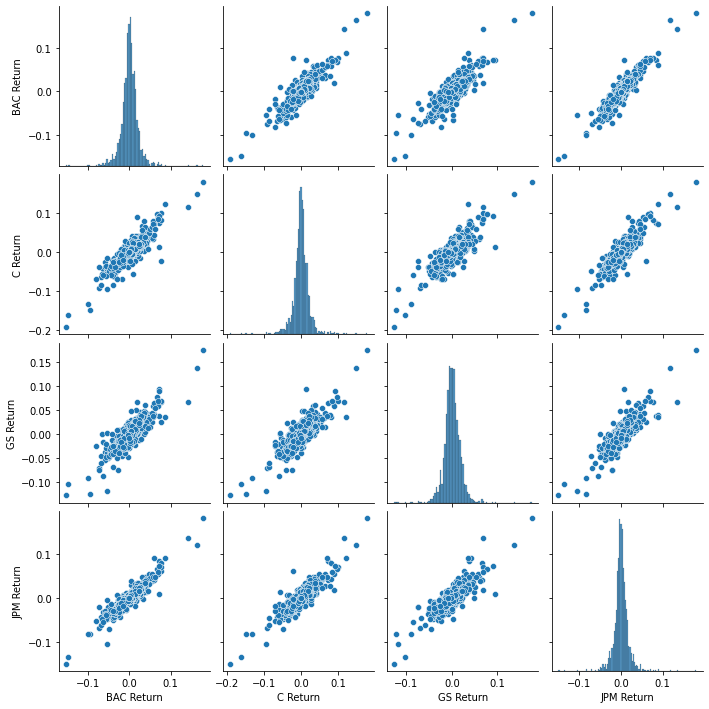

In [38]:
sns.pairplot(data = returns)

In [42]:
returns.idxmax(axis =0)

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
dtype: datetime64[ns]

In [40]:
returns.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
dtype: datetime64[ns]

In [43]:
returns.std()

BAC Return    0.021096
C Return      0.022607
GS Return     0.019418
JPM Return    0.018424
dtype: float64

In [50]:
returns.loc['2021-01-01':'2021-12-31'].std()

BAC Return    0.016056
C Return      0.016366
GS Return     0.015857
JPM Return    0.013441
dtype: float64

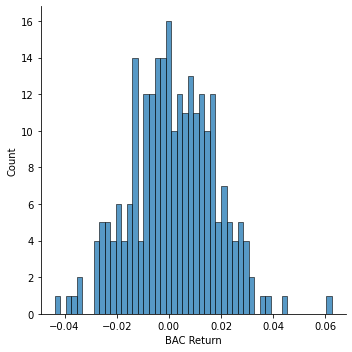

In [57]:
sns.displot(returns.loc['2021-01-01':'2021-12-31']['BAC Return'],bins =50)

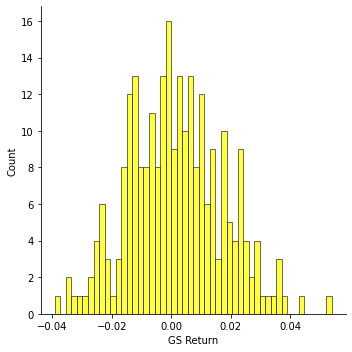

In [61]:
sns.displot(returns.loc['2021-01-01':'2021-12-31']['GS Return'],bins =50,color = 'yellow')

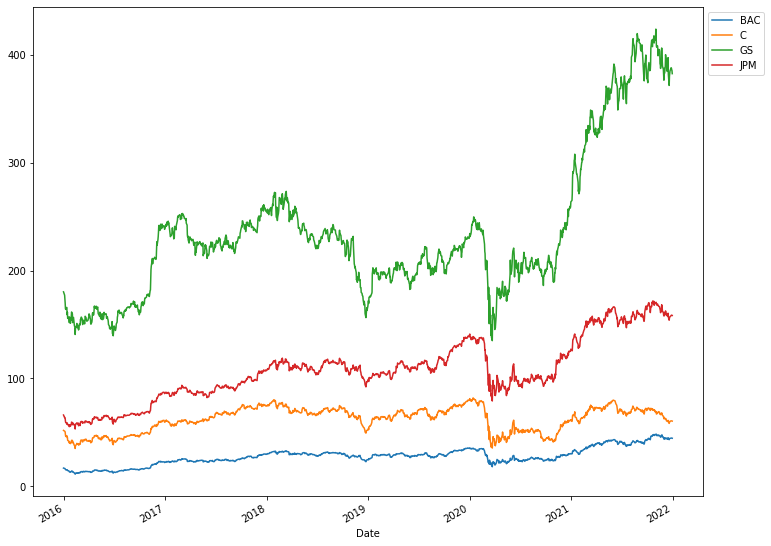

In [71]:
bank_stocks.xs(key = 'Close',level = 'Stock Info',axis =1).plot(figsize = (12,10))
plt.legend(bbox_to_anchor = (1,1),loc = 2)

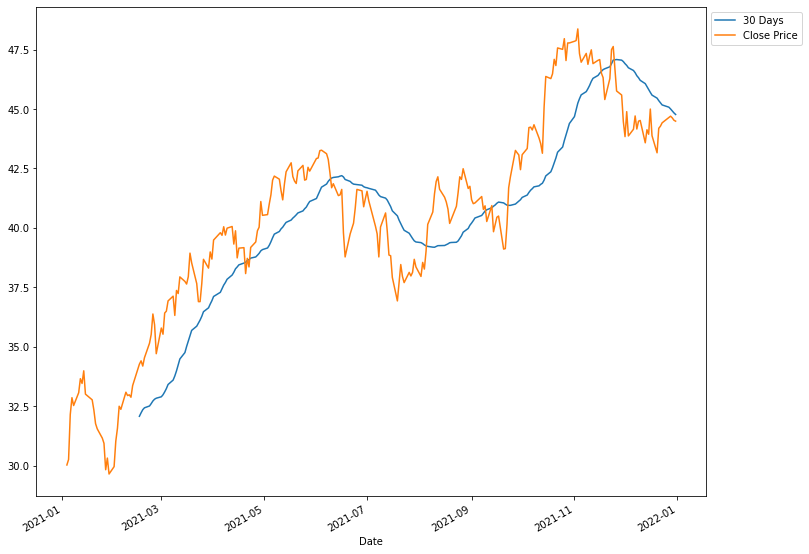

In [79]:
# 30 Day rolling avg VS close price of BCA in 2021
BAC['Close'].loc['2021-01-01':'2021-12-31'].rolling(window = 30).mean().plot(figsize = (12,10),label = '30 Days')
BAC['Close'].loc['2021-01-01':'2021-12-31'].plot(label = 'Close Price')
plt.legend(bbox_to_anchor = (1,1),loc =2)

<AxesSubplot:xlabel='Bank Tickers', ylabel='Bank Tickers'>

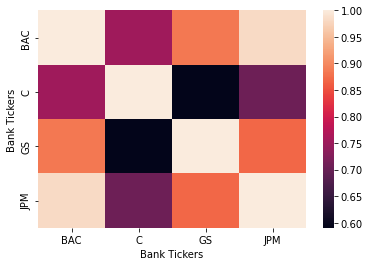

In [85]:
sns.heatmap(bank_stocks.xs('Close',level = 'Stock Info',axis =1).corr())

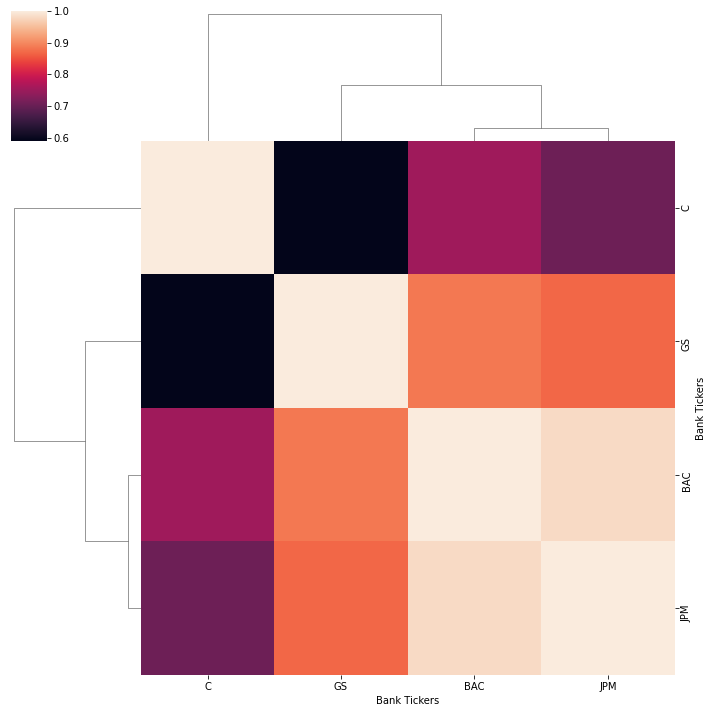

In [86]:
sns.clustermap(bank_stocks.xs('Close',level = 'Stock Info',axis =1).corr())